In [ ]:
def read_from_stdio():
    str_ = input()
    return str_

def io_to_dist_matrix(inp_string):
    inp = inp_string.split("\n")
    n, inp = int(inp[0]), [e.split(" ") for e in inp[1:]]
    #print(inp)
    inp = [[float(e) for e in inp_] for inp_ in inp]

    dist = [[0 for _ in range(n)] for _ in range(n)]
    for i, (x1, y1) in enumerate(inp):
        for j, (x2, y2) in enumerate(inp):
            dist[i][j] = round(((x1 - x2)**2 + (y1 - y2)**2) **0.5)

    return dist, inp

def tour_cost(dm, tour, wrap=True):
    c = 0.
    n = len(dm)
    for i, v in enumerate([tour, tour[:-1]][int(wrap==False)]):
        c += dm[v][tour[(i + 1) % n]]
    return c


def greedy_tour(dist):
    n = len(dist)
    assert(n > 0)
    tour = [0]
    used = set([0])
    for i in range(1, n):
        neighbor_costs = [dist[i][j] if j != i and j not in used else max(dist[i]) + 1 for j in range(n)]
        nm = neighbor_costs.index(min(neighbor_costs))
        tour.append(nm)
        used.add(nm)

    return tour

def two_opt(dm, tour):
    n = len(dm)

    for i, v1 in enumerate(tour):
        for j, v2 in enumerate(tour):
            if j <= i:
                continue
            x1c = dm[v1][tour[(i + 1) % n]]
            x2c = dm[tour[(j - 1) % n]][v2]
            y1c = dm[v1][tour[(j - 1) % n]]
            y2c = dm[tour[(i + 1) % n]][tour[j]]
            if (x1c + x2c > y1c + y2c):
                tour[i:j] = tour[i:j][::-1]
    #for i, v in
    return tour

def opt(dist, tour):
    tour = greedy_tour(dist)
    for i in range(15):
        tour = two_opt(dist, tour)

    return tour

def main():
    str = sample_in
    #str = read_from_stdio()
    dist, point_matrix = io_to_dist_matrix(str)

    tour = greedy_tour(dist)
    tour = opt(dist, tour)

    for t in tour:
        print(t,end="\n")

    #print(tour_cost(dist, [9, 6, 2, 9, 3, 5, 8, 4, 7, 1, 9], wrap=False))
    #they got this to be 264.70

if __name__ == "__main__":
    main()


In [ ]:

#!cat t.txt | python tsp.py

In [1]:
def random_dist_matrix(n, x_scale, y_scale):
    import random
    random.seed(0)

    matrix = [[0, 0] for _ in range(n)]
    for i in range(n):
        x, y = random.random() * x_scale, random.random() * y_scale
        matrix[i][0] = x
        matrix[i][1] = y

    dist_matrix = [[0 for _ in range(n)] for _ in range(n)]
    for i, xy1 in enumerate(matrix):
        for j, xy2 in enumerate(matrix):
            x1 = xy1[0]
            y1 = xy1[1]
            x2 = xy2[0]
            y2 = xy2[1]
            dist_matrix[i][j] = round(((x1 - x2)**2 + (y1 - y2)**2) **0.5)

    dist_str = str(n) + "\n"
    for x, y in matrix:
        dist_str += str(x) + " " + str(y) + "\n"

    return dist_matrix, dist_str, matrix

dist, dist_str, matrix = random_dist_matrix(200, 1000000, 1000000)
#print(dist)
#tour = greedy_tour(dist)
#tour = opt(dist, tour)

#for t in tour:
#    print(t,end="\two_opt(tour_on")

#!echo "$dist_str" | python3 tsp.py
!g++ main.cpp -g
!echo "$dist_str" |  ./a.out | tee out.txt 

0
19
29
59
90
36
50
73
38
43
39
47
8
14
40
9
65
75
27
15
61
89
22
87
24
71
16
51
6
10
92
46
13
4
81
49
32
60
33
95
98
18
91
85
42
7
34
41
2
80
97
82
72
28
23
78
68
55
76
56
20
66
26
86
67
52
64
93
62
35
69
94
88
1
79
12
37
70
17
84
99
58
48
54
74
63
21
83
3
53
77
25
30
5
57
96
44
45
31
11

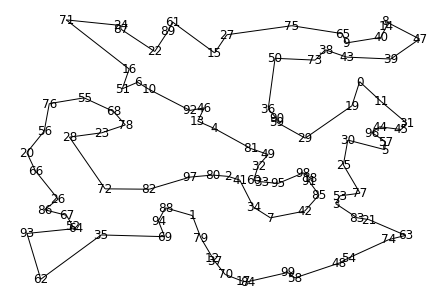

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

nodes = []
with open("out.txt") as f:
    for line in f.readlines():
        try:
            nodes.append(int(line.strip()))
        except TypeError:
            pass


#g = nx.Graph(matrix)
g = nx.Graph()

for i in range(len(nodes)):
    g.add_node(i, pos=(matrix[i][0], matrix[i][1]))

for i in range(len(nodes) - 1):
    g.add_edge(nodes[i], nodes[i + 1])
g.add_edge(nodes[-1], nodes[0])


nx.draw(g, nx.get_node_attributes(g, 'pos'), with_labels=True, node_size=0) 
plt.show()

In [ ]:
#%%capture output
#!python3 submit.py -p tsp -m tsp.cpp -l c++ -f *.cpp *.h

#Submission received. Submission ID: XXXXX
#Open in browser (y/N)?

In [ ]:
"""
print(output)
#['Submission received. Submission ID: XXXXX.\r'
submission_id = str(output).strip('\r')
submission_id = submission_id.split("\n")[0].split(" ")[-1]
submission_id = submission_id[:-2]

url = "open.kattis.com/submission/" + submission_id
print(url)
!curl $url
"""